In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv(r"C:\\Users\\kumar\\OneDrive\\Desktop\\Dataset_Project\\sales_and_customer_insights.csv")
sales.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [5]:
sales.shape

(10000, 15)

In [7]:
sales.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

# Luckly we don't have any null values

In [10]:
sales.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


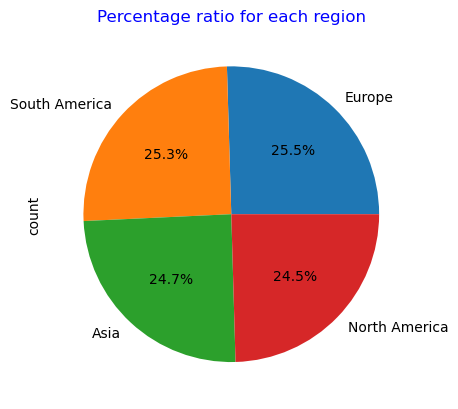

In [121]:
sales["Region"].value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("Percentage ratio for each region" , color = "blue")
plt.show()

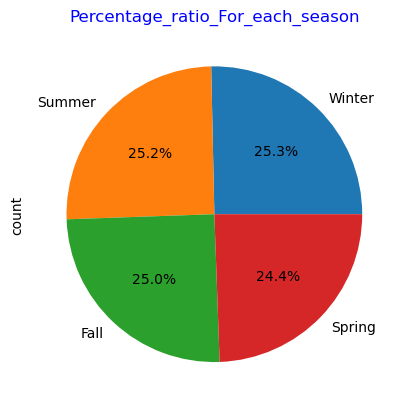

In [119]:
sales["Season"].value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("Percentage_ratio_For_each_season", color = "blue")
plt.show()

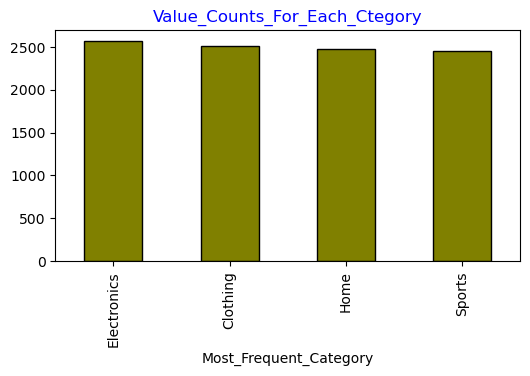

In [117]:
plt.figure(figsize=(6,3))
sales["Most_Frequent_Category"].value_counts().plot.bar(color = "olive", edgecolor = "black")
plt.title("Value_Counts_For_Each_Ctegory", color = "blue")
plt.show()

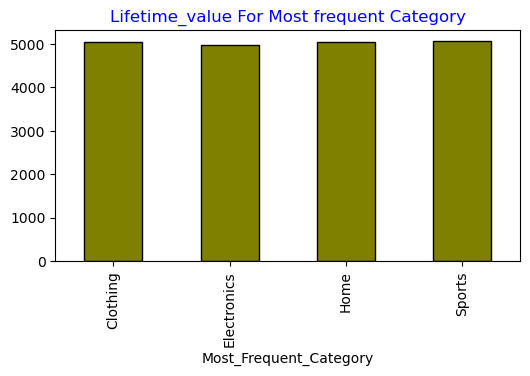

In [115]:
plt.figure(figsize=(6,3))
sales.groupby("Most_Frequent_Category")["Lifetime_Value"].mean().plot.bar(color = "olive", edgecolor = "black")
plt.title("Lifetime_value For Most frequent Category", color = 'blue')
plt.show()

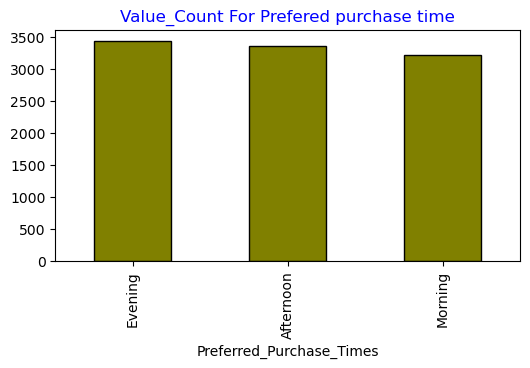

In [113]:
plt.figure(figsize=(6,3))
sales['Preferred_Purchase_Times'].value_counts().plot.bar(color = 'olive', edgecolor = 'black')
plt.title("Value_Count For Prefered purchase time", color = "blue")
plt.show()

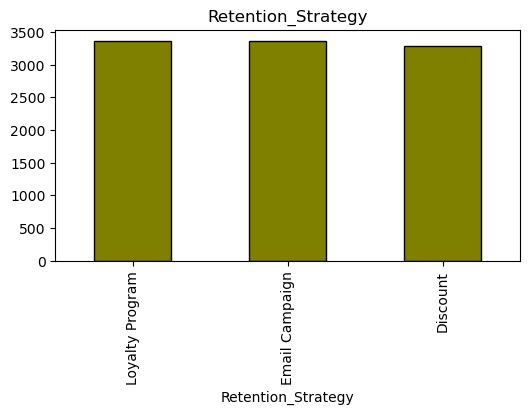

In [19]:
plt.figure(figsize=(6,3))
sales["Retention_Strategy"].value_counts().plot.bar(color = 'olive', edgecolor = "black")
plt.title("Retention_Strategy")
plt.show()

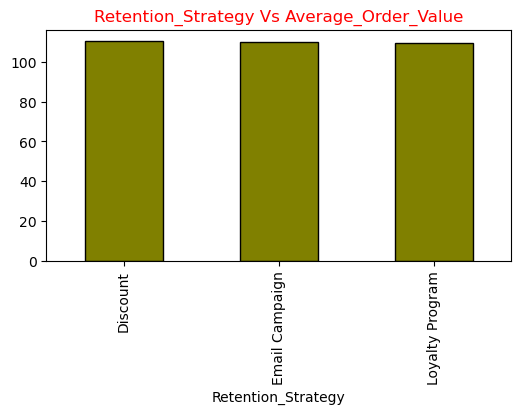

In [20]:
plt.figure(figsize=(6,3))
sales.groupby("Retention_Strategy")["Average_Order_Value"].mean().plot.bar(color = 'olive' , edgecolor = "black")
plt.title("Retention_Strategy Vs Average_Order_Value", color = "red")
plt.show()

## What retention strategy works best in each region or season? 

In [23]:
correlation = sales['Time_Between_Purchases'].corr(sales['Purchase_Frequency'])
print("Correlation:", correlation)

Correlation: -0.008884609069593482


# Here  we can say that there  is no correlation between "Time_Between_Purchases" and "Purchase_Frequency"

In [27]:
sales["Most_Frequent_Category"].value_counts()

Most_Frequent_Category
Electronics    2567
Clothing       2510
Home           2476
Sports         2447
Name: count, dtype: int64

In [28]:
sales["Retention_Strategy"].value_counts()

Retention_Strategy
Loyalty Program    3364
Email Campaign     3359
Discount           3277
Name: count, dtype: int64

In [30]:
category_strategy = sales.groupby(['Most_Frequent_Category', 'Retention_Strategy']).size().unstack().fillna(0)
category_strategy

Retention_Strategy,Discount,Email Campaign,Loyalty Program
Most_Frequent_Category,,,
Clothing,818,840,852
Electronics,788,910,869
Home,832,810,834
Sports,839,799,809


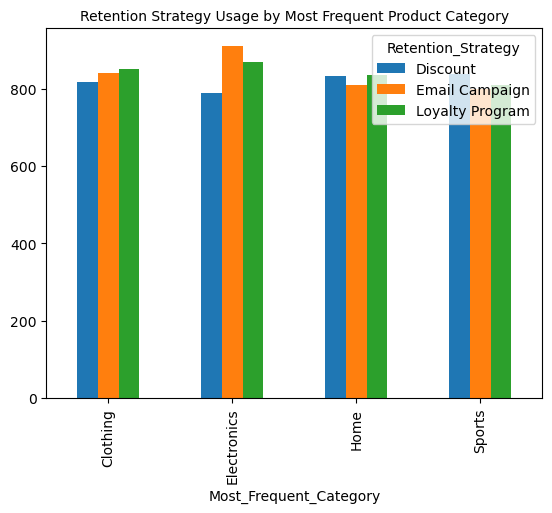

In [111]:
category_strategy.plot.bar()
plt.title('Retention Strategy Usage by Most Frequent Product Category', fontsize=10)
plt.show()

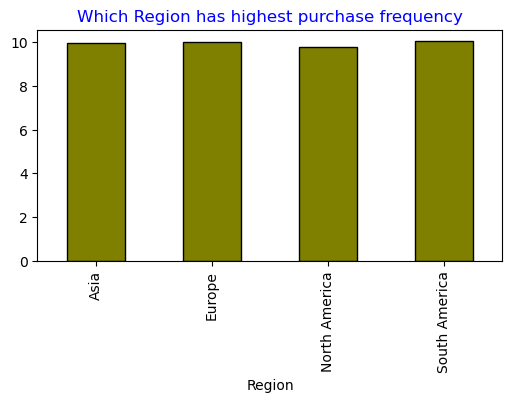

In [35]:
plt.figure(figsize=(6,3))

sales.groupby("Region")["Purchase_Frequency"].mean().plot.bar(color = "olive", edgecolor = "black")

plt.title("Which Region has highest purchase frequency", color = "blue")

plt.show()

In [38]:
sales.groupby("Season")["Purchase_Frequency"].mean()

Season
Fall       9.924460
Spring     9.990995
Summer     9.898453
Winter    10.009471
Name: Purchase_Frequency, dtype: float64

## How does average order value vary across different retention strategies?

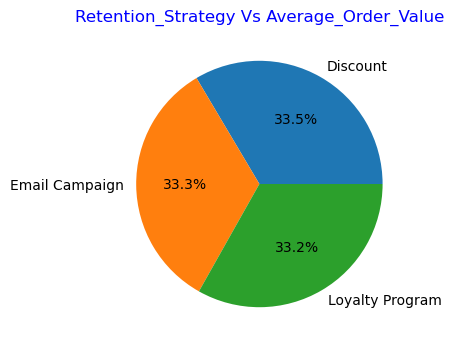

In [109]:
plt.figure(figsize = (6,4))
sales.groupby("Retention_Strategy")["Average_Order_Value"].mean().plot.pie(
    autopct="%1.1f%%",
    ylabel=''  # Remove y-axis label to prevent overlap
)
plt.title("Retention_Strategy Vs Average_Order_Value", color='blue')
plt.show()

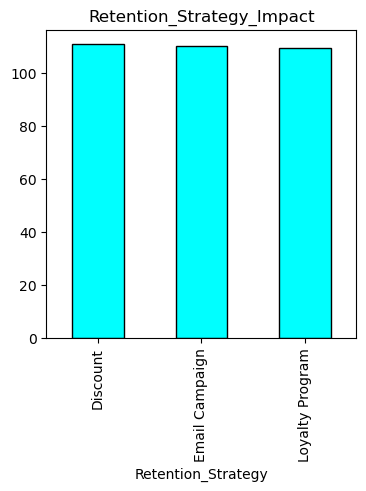

In [151]:
plt.figure(figsize=(4,4))
sales.groupby("Retention_Strategy")["Average_Order_Value"].mean().plot.bar(color = "cyan", edgecolor = "black")
plt.title("Retention_Strategy_Impact")
plt.show()

In [42]:
sales[['Time_Between_Purchases', 'Churn_Probability']].corr()

,Time_Between_Purchases,Churn_Probability
Time_Between_Purchases,1.00000,0.01041
Churn_Probability,0.01041,1.00000


## We find only 1.041 % Correlation between these two columns
### So we can say Customers who wait longer between purchases don’t necessarily have a higher or lower chance of churning.

In [48]:
sales[['Purchase_Frequency', 'Churn_Probability']].corr()

,Purchase_Frequency,Churn_Probability
Purchase_Frequency,1.000000,0.018417
Churn_Probability,0.018417,1.000000


### Same For Purchase_Frequency only 1.84 % churn Corrlation.

In [55]:
sales.groupby("Most_Frequent_Category")["Lifetime_Value"].mean()

Most_Frequent_Category
Clothing       5047.698829
Electronics    4973.470783
Home           5041.930477
Sports         5066.964548
Name: Lifetime_Value, dtype: float64

### Preferred_Purchase_Times Vs Season

In [58]:
season_preferredtime = sales.groupby(['Season', 'Preferred_Purchase_Times']).size().unstack().fillna(0)
season_preferredtime

Preferred_Purchase_Times,Afternoon,Evening,Morning
Season,,,
Fall,858,832,812
Spring,791,838,814
Summer,823,885,813
Winter,882,878,774


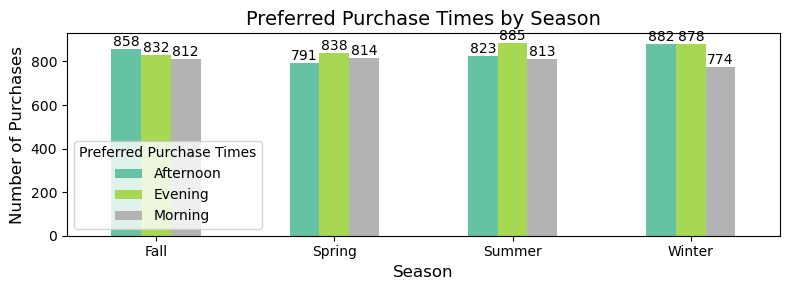

In [60]:
# Your grouped data is stored in: season_preferredtime
ax = season_preferredtime.plot(kind='bar', figsize=(8,3), colormap='Set2')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Set titles and labels
plt.title("Preferred Purchase Times by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Preferred Purchase Times")
plt.tight_layout()
plt.show()

In [62]:
sales.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


### Retention_Strategy Vs  Region

In [64]:
Region_retention = sales.groupby(['Region', 'Retention_Strategy']).size().unstack().fillna(0)
Region_retention

Retention_Strategy,Discount,Email Campaign,Loyalty Program
Region,,,
Asia,784,858,830
Europe,857,811,879
North America,807,852,795
South America,829,838,860


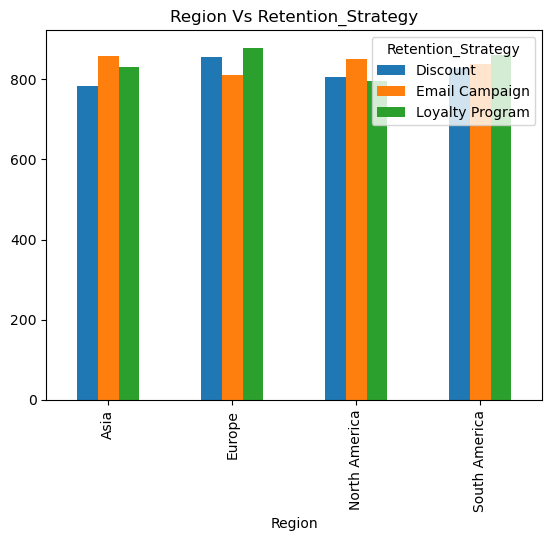

In [131]:
Region_retention.plot.bar()
plt.title("Region Vs Retention_Strategy")
plt.show()

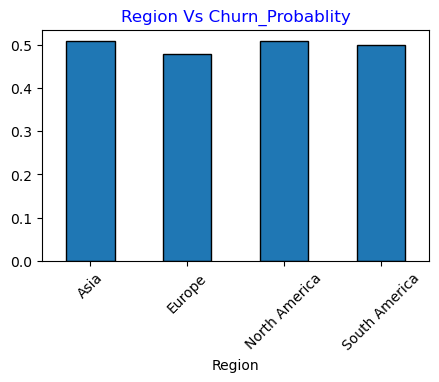

In [95]:
plt.figure(figsize=(5,3))
sales.groupby("Region")["Churn_Probability"].median().plot.bar(edgecolor = "black")
plt.title("Region Vs Churn_Probablity" , color = 'Blue')
plt.xticks(rotation = 45)
plt.show()

In [123]:
sales.columns

Index(['Customer_ID', 'Product_ID', 'Transaction_ID', 'Purchase_Frequency',
       'Average_Order_Value', 'Most_Frequent_Category',
       'Time_Between_Purchases', 'Region', 'Churn_Probability',
       'Lifetime_Value', 'Launch_Date', 'Peak_Sales_Date', 'Season',
       'Preferred_Purchase_Times', 'Retention_Strategy'],
      dtype='object')

In [125]:
season_frequent_category = sales.groupby(['Season', 'Most_Frequent_Category']).size().unstack().fillna(0)
season_frequent_category

Most_Frequent_Category,Clothing,Electronics,Home,Sports
Season,,,,
Fall,650,628,611,613
Spring,572,623,638,610
Summer,624,639,611,647
Winter,664,677,616,577


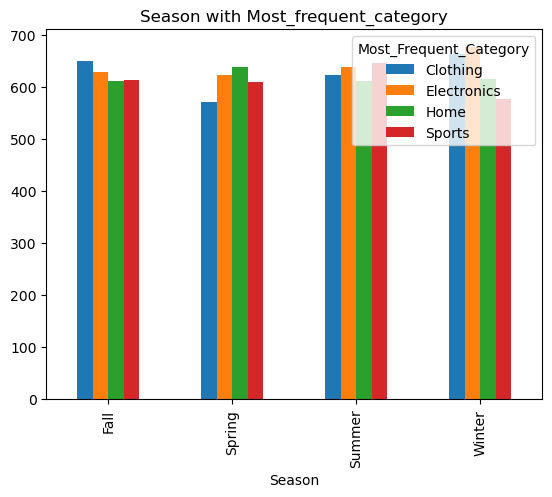

In [143]:
season_frequent_category.plot.bar()
plt.title("Season with Most_frequent_category")
plt.show()

## 📊 Sales Insight Analysis – Summary of Key Insights
#### 1. Regional Sales Distribution
#### The pie chart showed that each region contributes differently to overall sales.

## This helps identify dominant markets and areas needing targeted strategies.

#### 2. Sales by Season
## Season-wise distribution highlighted that Winter and Fall have relatively higher customer engagement compared to Spring and Summer.

#### 3. Most Frequent Product Category
## Clothing and Electronics are the most frequently purchased categories.

### Bar chart visualization revealed category-wise popularity and buying trends.

#### 4. Lifetime Value by Category
## Among all, Electronics and Home products showed higher average lifetime values, indicating long-term customer retention.

#### 5. Preferred Purchase Times
## Evening time is the most preferred slot for shopping, followed by Afternoon and Morning.

### Businesses can schedule marketing campaigns or discounts around these times.

#### 6. Retention Strategy Analysis
## Most used strategy: Email Campaigns, closely followed by Loyalty Programs and Discounts.

## However, the Discount strategy resulted in the highest Average Order Value (Rs. 110.64), outperforming others slightly.

#### 7. Retention Strategy vs Product Category
## Clothing and Electronics received the highest number of retention efforts across all three strategies.

### Suggests these categories are key to retaining customers and should be prioritized in marketing.

#### 8. Region vs Retention Strategy
## Europe leans more towards Loyalty Programs, while Asia and North America show higher preference for Email Campaigns and Discounts.

## Custom strategies per region could improve retention outcomes.

#### 9. Region-wise Purchase Frequency
## Europe has the highest average purchase frequency, indicating stronger customer engagement in that market.

#### 10. Retention Strategy Pie Chart
## Another representation confirmed that the Discount strategy, though less frequently used, results in the highest return per order.

#### 11. Season vs Preferred Purchase Time
## Winter & Fall afternoons and evenings see the most purchases.

#### This can help plan inventory, staff allocation, and promotional campaigns more efficiently.

#### 12. Season vs Frequent Category
### Winter sees a surge in Clothing and Electronics, while Summer trends toward Sports products.

## Product promotions can be seasonally aligned for better sales.